# Import all zillow rent indices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#filepath input is for if directories are different on each machine


#if csvs are in same directory as notebook, set filepath = './'
# filepath = input('Enter file path where csv files are located on your machine\n')
filepath = '../../renycdsa7parkcapstonekickoff'

# my filepath is ../../renycdsa7parkcapstonekickoff

multi = pd.read_csv(filepath + '/Zip_Zri_MultiFamilyResidenceRental.csv',dtype = {'RegionName':str})
# homes = pd.read_csv(filepath + '/Zip_Zri_AllHomesPlusMultifamily.csv',dtype = {'RegionName':str})
# single = pd.read_csv(filepath + '/Zip_Zri_SingleFamilyResidenceRental.csv',dtype = {'RegionName':str})

def zero_zips(df):
    '''Adds zeros to beginning of zip codes that were chopped off when of int dtype
    
    Args:
    
    df: name of the DataFrame'''
    return df['RegionName'].apply(lambda Z: '0'*(5-len(Z))+Z)

multi['RegionName'] = zero_zips(multi)
# homes['RegionName'] = zero_zips(homes)
# single['RegionName'] = zero_zips(single)

print(multi.shape)
# print(single.shape)
# print(homes.shape)

(1861, 120)


In [2]:
multi = pd.melt(multi, id_vars =multi.columns[:7],
                value_vars = multi.columns[7:],
               var_name = 'Date',value_name = 'Rent')
multi['Date'] = pd.to_datetime(multi['Date'])
multi.rename(columns = {'RegionName':'Zipcode'}, inplace = True)



multi.sample(10)

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Rent
82267,97548,94086,Sunnyvale,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,384,2014-05-01,2401.0
18503,86641,64870,Webb City,MO,Joplin,Jasper County,1755,2011-06-01,775.0
61989,99012,97006,Beaverton,OR,Portland-Vancouver-Hillsboro,Washington County,577,2013-06-01,NaN
75663,90786,75234,Farmers Branch,TX,Dallas-Fort Worth-Arlington,Dallas County,1224,2014-01-01,NaN
21366,60105,06040,Manchester,CT,Hartford-West Hartford-East Hartford,Hartford County,896,2011-08-01,988.0
186590,89749,72764,Springdale,AR,Fayetteville-Springdale-Rogers,Washington County,491,2019-01-01,924.0
149601,96124,90278,Redondo Beach,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,722,2017-05-01,2472.0
95356,65807,19140,Philadelphia,PA,Philadelphia-Camden-Wilmington,Philadelphia County,446,2014-12-01,826.0
13413,65811,19144,Philadelphia,PA,Philadelphia-Camden-Wilmington,Philadelphia County,387,2011-04-01,NaN
38223,74234,37203,Nashville,TN,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,1004,2012-05-01,NaN


## Select Austin, TX data

In [4]:
austin = multi.loc[(multi['City'] == 'Austin') & (multi['State']=='TX')].set_index('Date')

austin.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Rent
Date,,,,,,,,
2010-09-01,92617,78704,Austin,TX,Austin-Round Rock,Travis County,65,1349.0
2010-09-01,92654,78745,Austin,TX,Austin-Round Rock,Travis County,83,1340.0
2010-09-01,92657,78748,Austin,TX,Austin-Round Rock,Travis County,282,NaN
2010-09-01,92667,78758,Austin,TX,Austin-Round Rock,Travis County,287,907.0
2010-09-01,92651,78741,Austin,TX,Austin-Round Rock,Travis County,304,1222.0


In [5]:
# plt.figure(figsize = (15,10))
# import seaborn as sns
# sns.scatterplot(data=austin_slice, x = austin_slice.index, y = 'Rent', hue = 'Zipcode')

Text(0.5, 1.0, 'Number of complete cases over time')

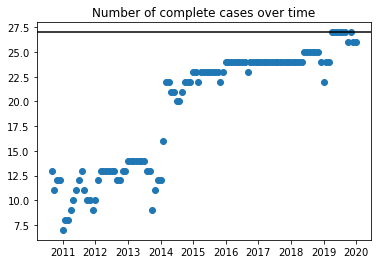

In [6]:
find_zips = austin.reset_index().set_index('Zipcode')
missing_zips =find_zips[['Date','Rent']].loc[find_zips['Rent'].isnull()]
graph_nulls = missing_zips['Date'].value_counts()

# plt.scatter(graph_nulls.index,graph_nulls)


full_zips = find_zips[['Date','Rent']].loc[~find_zips['Rent'].isnull()]
graph_full = full_zips['Date'].value_counts()

plt.scatter(graph_full.index,graph_full)
plt.axhline(y = 27,color = 'k')
plt.title('Number of complete cases over time')

## Impute for each zip code

In [7]:
fill_rents = austin[['Zipcode','Rent']].copy()
austin.drop('Rent', axis = 1, inplace = True)
fill_rents = fill_rents.reset_index().pivot(index = 'Date',columns = 'Zipcode')['Rent'].reset_index()
    
fill_rents.fillna(method = 'bfill',inplace = True)


In [8]:
fill_rents = pd.melt(fill_rents, id_vars='Date', value_vars = fill_rents.columns[1:],var_name='Zipcode',value_name = 'Rent')

fill_rents.head()

,Date,Zipcode,Rent
0,2010-09-01,78701,1524.0
1,2010-10-01,78701,1533.0
2,2010-11-01,78701,1562.0
3,2010-12-01,78701,1595.0
4,2011-01-01,78701,1616.0


In [9]:
austin = pd.merge(austin, fill_rents, on = ['Date','Zipcode'])

# Importing data from BLS and BEA

In [10]:
# labor = pd.read_excel('~/Downloads/atx_laborforce.xlsx',skiprows=10)


# labor = pd.melt(labor, id_vars = 'Year', value_vars = labor.columns[1:],var_name = 'Month', value_name = 'LaborForce')

# labor.sample(15)

In [11]:
personal = pd.read_csv('~/Downloads/atx_personal.csv',skiprows = 4)

personal.head()

,GeoFips,GeoName,LineCode,Description,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,12420,"Austin-Round Rock-Georgetown, TX (Metropolitan...",1.0,Personal income (thousands of dollars),52344576.0,58694122.0,62599379.0,67819889.0,65884392.0,70355303.0,77881693.0,85635903.0,88954305.0,97179427.0,103077251.0,108054841.0,118651329.0,129146253.0,138028065.0
1,12420,"Austin-Round Rock-Georgetown, TX (Metropolitan...",2.0,Population (persons) 1/,1453358.0,1515485.0,1577856.0,1633870.0,1682338.0,1727502.0,1780535.0,1834586.0,1883315.0,1942467.0,2002134.0,2062016.0,2115475.0,2165497.0,2227083.0
2,12420,"Austin-Round Rock-Georgetown, TX (Metropolitan...",3.0,Per capita personal income (dollars) 2/,36016.0,38730.0,39674.0,41509.0,39162.0,40727.0,43741.0,46679.0,47233.0,50029.0,51484.0,52403.0,56087.0,59638.0,61977.0
3,Legend / Footnotes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/ Census Bureau midyear population estimates....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# leisure = pd.read_excel('~/Downloads/atx_leisure.xlsx',skiprows = 12)
# leisure.head(12)

# leisure = pd.melt(leisure, id_vars = 'Year', value_vars = leisure.columns[1:],var_name = 'Month', value_name = 'NumEmp')
# leisure['NumEmp'] = leisure['NumEmp'].apply(lambda N: N*1000)
# leisure.sample(15)

# atx = pd.merge(labor,leisure, on = ['Year','Month'])
# atx.sample(15)

# atx.to_csv('atx_leisure_labor.csv',index=False)

In [13]:
personal= personal.loc[:2,:]
personal = pd.melt(personal, id_vars = 'Description', value_vars = personal.columns[4:],var_name='Year')

personal.head()

,Description,Year,value
0,Personal income (thousands of dollars),2005,52344576.0
1,Population (persons) 1/,2005,1453358.0
2,Per capita personal income (dollars) 2/,2005,36016.0
3,Personal income (thousands of dollars),2006,58694122.0
4,Population (persons) 1/,2006,1515485.0


In [14]:
personal = personal.pivot(index = 'Year',columns = 'Description')['value'].reset_index()

personal.columns = ['Year','Income_per_capita','Personal_income','Population']

pers_inc = personal[['Year','Income_per_capita','Population']].copy()

pers_inc.head()

,Year,Income_per_capita,Population
0,2005,36016.0,1453358.0
1,2006,38730.0,1515485.0
2,2007,39674.0,1577856.0
3,2008,41509.0,1633870.0
4,2009,39162.0,1682338.0


In [15]:
#made the csv in another directory
atx = pd.read_csv('../../renycdsa7parkcapstonekickoff/atx_leisure_labor.csv')
atx.rename(columns = {'NumEmp':'LeisureEmp'},inplace = True)

In [16]:
pers_inc['Year'] = pers_inc['Year'].astype(int)
atx = pd.merge(atx,pers_inc, how = 'left', on = 'Year')

atx.head(15)

,Year,Month,LaborForce,LeisureEmp,Income_per_capita,Population
0,2011,Jan,944609.0,84800.0,43741.0,1780535.0
1,2012,Jan,973023.0,88800.0,46679.0,1834586.0
2,2013,Jan,1005093.0,94500.0,47233.0,1883315.0
3,2014,Jan,1035195.0,100300.0,50029.0,1942467.0
4,2015,Jan,1055960.0,106800.0,51484.0,2002134.0
5,2016,Jan,1095060.0,115700.0,52403.0,2062016.0
6,2017,Jan,1138412.0,119500.0,56087.0,2115475.0
7,2018,Jan,1178562.0,124100.0,59638.0,2165497.0
8,2019,Jan,1221167.0,129300.0,61977.0,2227083.0
9,2020,Jan,1253815.0,132500.0,NaN,NaN


In [17]:
import calendar

month_num = {month: index for index, month in enumerate(calendar.month_abbr) if month}

month_num

{'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [18]:
atx['Month'] = atx['Month'].apply(lambda M: month_num[M])

atx.sample()

,Year,Month,LaborForce,LeisureEmp,Income_per_capita,Population
10,2021,1,1258589.0,104100.0,NaN,NaN


In [19]:
atx['Date'] = atx[['Year','Month']].apply(lambda D: '-'.join(D.values.astype(str)), axis = 1)
atx['Date'] = pd.to_datetime(atx['Date'])

In [20]:
atx.head()

,Year,Month,LaborForce,LeisureEmp,Income_per_capita,Population,Date
0,2011,1,944609.0,84800.0,43741.0,1780535.0,2011-01-01
1,2012,1,973023.0,88800.0,46679.0,1834586.0,2012-01-01
2,2013,1,1005093.0,94500.0,47233.0,1883315.0,2013-01-01
3,2014,1,1035195.0,100300.0,50029.0,1942467.0,2014-01-01
4,2015,1,1055960.0,106800.0,51484.0,2002134.0,2015-01-01


## Import credit card data from CFPB

In [21]:
cc_volume = pd.read_csv('~/Downloads/volume_data_Income_Level_CRC.csv')

In [22]:
#keep only the low and moderate income data

cc_volume = cc_volume.loc[cc_volume['income_level_group'].isin(['Low','Moderate'])]

cc_volume.head(10)

,month,date,vol,vol_unadj,income_level_group
2,60,2005-01,4.578106e+09,3.978007e+09,Moderate
3,60,2005-01,7.635135e+08,6.517910e+08,Low
6,61,2005-02,4.563908e+09,3.900504e+09,Moderate
7,61,2005-02,7.558710e+08,6.549358e+08,Low
10,62,2005-03,4.762458e+09,4.775794e+09,Moderate
11,62,2005-03,8.171551e+08,8.352900e+08,Low
14,63,2005-04,4.744005e+09,4.683566e+09,Moderate
15,63,2005-04,7.854169e+08,7.721479e+08,Low
18,64,2005-05,4.752915e+09,4.608128e+09,Moderate
19,64,2005-05,8.289172e+08,8.354502e+08,Low


In [23]:
cc_volume = cc_volume.pivot(index = 'date', columns = 'income_level_group')['vol'].reset_index()

cc_volume.columns = ['Date','Low_income_volume','Moderate_income_volume']

cc_volume.head()

,Date,Low_income_volume,Moderate_income_volume
0,2005-01,7.635135e+08,4.578106e+09
1,2005-02,7.558710e+08,4.563908e+09
2,2005-03,8.171551e+08,4.762458e+09
3,2005-04,7.854169e+08,4.744005e+09
4,2005-05,8.289172e+08,4.752915e+09


In [24]:
cc_volume['Date'] = pd.to_datetime(cc_volume['Date'])

In [25]:
cc_volume

,Date,Low_income_volume,Moderate_income_volume
0,2005-01-01,7.635135e+08,4.578106e+09
1,2005-02-01,7.558710e+08,4.563908e+09
2,2005-03-01,8.171551e+08,4.762458e+09
3,2005-04-01,7.854169e+08,4.744005e+09
4,2005-05-01,8.289172e+08,4.752915e+09
...,...,...,...
158,2018-03-01,8.935432e+08,4.476840e+09
159,2018-04-01,8.753101e+08,4.440339e+09
160,2018-05-01,8.904970e+08,4.571036e+09
161,2018-06-01,8.982546e+08,4.398129e+09


In [26]:
austin = pd.merge(austin,cc_volume, how = 'left', on = 'Date')

In [27]:
austin = pd.merge(austin, atx, how = 'left', on = 'Date')

In [28]:
austin.head(15)

,Date,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Rent,Low_income_volume,Moderate_income_volume,Year,Month,LaborForce,LeisureEmp,Income_per_capita,Population
0,2010-09-01,92617,78704,Austin,TX,Austin-Round Rock,Travis County,65,1349.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-09-01,92654,78745,Austin,TX,Austin-Round Rock,Travis County,83,1340.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-09-01,92657,78748,Austin,TX,Austin-Round Rock,Travis County,282,949.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-09-01,92667,78758,Austin,TX,Austin-Round Rock,Travis County,287,907.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-09-01,92651,78741,Austin,TX,Austin-Round Rock,Travis County,304,1222.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-09-01,92662,78753,Austin,TX,Austin-Round Rock,Travis County,324,834.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
6,2010-09-01,92668,78759,Austin,TX,Austin-Round Rock,Travis County,358,1168.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
7,2010-09-01,92653,78744,Austin,TX,Austin-Round Rock,Travis County,752,1255.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
8,2010-09-01,92634,78723,Austin,TX,Austin-Round Rock,Travis County,888,923.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
9,2010-09-01,92658,78749,Austin,TX,Austin-Round Rock,Travis County,919,1022.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
austin.to_csv('austin_data.csv', index = False)

In [30]:
austin_df = austin.drop(['RegionID','City','State','Metro','CountyName','Year','Month'],axis = 1).\
sort_values(by = 'Date').set_index('Date')

In [31]:

austin_df.head(15)

,Zipcode,SizeRank,Rent,Low_income_volume,Moderate_income_volume,LaborForce,LeisureEmp,Income_per_capita,Population
Date,,,,,,,,,
2010-09-01,78704,65,1349.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78730,1831,1243.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78701,1749,1524.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78752,1593,960.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78751,1558,1060.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78754,1542,879.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78735,1518,1375.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78757,1380,1101.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78750,1325,1012.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN


In [32]:
austin_slice = austin_df['2011-01-01':'2018-07-01']

In [33]:
austin_slice.isnull().sum()

Zipcode                   0
SizeRank                  0
Rent                      0
Low_income_volume         0
Moderate_income_volume    0
LaborForce                0
LeisureEmp                0
Income_per_capita         0
Population                0
dtype: int64

<AxesSubplot:>

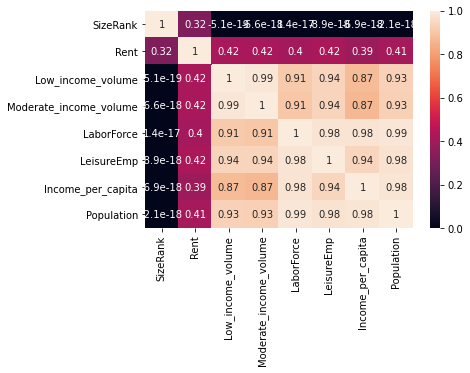

In [34]:
import seaborn as sns
austin_corrs  = austin_slice.corr()
sns.heatmap(austin_corrs, annot = True)

In [35]:
austin_slice.columns

Index(['Zipcode', 'SizeRank', 'Rent', 'Low_income_volume',
       'Moderate_income_volume', 'LaborForce', 'LeisureEmp',
       'Income_per_capita', 'Population'],
      dtype='object')

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X = austin_slice.drop(['Rent','Zipcode','LeisureEmp','Moderate_income_volume','Low_income_volume'],axis = 1)
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

             feature          VIF
0           SizeRank     4.782871
1         LaborForce  9004.491636
2  Income_per_capita  1490.114181
3         Population  6664.689801


In [37]:
len(austin_df['Zipcode'].value_counts())

27

In [38]:
austin_df.isnull().sum(axis = 0)

Zipcode                     0
SizeRank                    0
Rent                        1
Low_income_volume         486
Moderate_income_volume    486
LaborForce                108
LeisureEmp                108
Income_per_capita         135
Population                135
dtype: int64

In [39]:
austin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3051 entries, 2010-09-01 to 2020-01-01
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Zipcode                 3051 non-null   object 
 1   SizeRank                3051 non-null   int64  
 2   Rent                    3050 non-null   float64
 3   Low_income_volume       2565 non-null   float64
 4   Moderate_income_volume  2565 non-null   float64
 5   LaborForce              2943 non-null   float64
 6   LeisureEmp              2943 non-null   float64
 7   Income_per_capita       2916 non-null   float64
 8   Population              2916 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 318.4+ KB


# Predict using random forest

In [96]:
aus_forest = austin_slice.copy()
aus_forest['Zipcode'] = aus_forest['Zipcode'].astype(int)

# aus_forest.drop(['Zipcode','SizeRank'],axis = 1, inplace = True)

from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()

In [97]:
from sklearn.model_selection import train_test_split
import numpy as np
y = np.log(aus_forest['Rent'])
X = aus_forest.drop(['Rent'],axis = 1)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y)

In [144]:
Xtrain = X.loc[X.index <'2016-01-01']
train_index = Xtrain.shape[0]
Xtest = X[train_index:]
ytrain = y[:train_index]
ytest = y[train_index:]


In [151]:
rfc.fit(Xtrain,ytrain)
print(rfc.score(Xtest,ytest))

from sklearn.metrics import mean_squared_error


0.9133440142179069


In [147]:
rfc.score(Xtrain,ytrain)

0.9992539376802769

In [149]:
y_pred = rfc.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred,squared = False)
print(f'RMSE:{RMSE}')

RMSE:0.04011147673361343


In [113]:
# from sklearn.model_selection import cross_validate, KFold 

# cv = KFold(n_splits = 5, shuffle = True)

In [114]:
# cv_res = cross_validate(RandomForestRegressor(),X,y, cv = cv)

In [115]:
# np.mean(cv_res['test_score'])

0.9939976338671356

In [47]:
# cv_res2 = cross_validate(RandomForestRegressor(),X,y,cv = cv)

In [116]:
for col, imp in zip(X.columns,rfc.feature_importances_):
    print(f'{col}: {imp}')

Zipcode: 0.6179867312383247
SizeRank: 0.19649087105302046
Low_income_volume: 0.03148260652626159
Moderate_income_volume: 0.02953240284255497
LaborForce: 0.0708626446364485
LeisureEmp: 0.04357179322235214
Income_per_capita: 0.004839641703861051
Population: 0.005233308777176495


In [49]:
len(aus_forest['Zipcode'].value_counts())

27

# Try random forest using population from BigQuery

In [51]:
zipcodes = pd.read_csv('~/Downloads/zipcode_2.csv')

In [52]:
zipcodes = zipcodes[['geo_id','total_pop']]

aus_zip = zipcodes.loc[zipcodes['geo_id'].isin(aus_forest['Zipcode'])]

In [53]:
aus_zip

,geo_id,total_pop
3005,78751,15805
4320,78727,29509
5735,78701,9427
9390,78705,33948
9416,78752,21324
9617,78729,29315
10243,78744,48969
11172,78757,24823
15172,78731,27175
15181,78730,9186


In [54]:
aus_forest2 = pd.merge(aus_forest,aus_zip, left_on = 'Zipcode', right_on = 'geo_id')

In [55]:
aus_forest2.drop(['Population','geo_id'], axis = 1, inplace = True)

In [56]:
np.sum(aus_zip['total_pop'])

883523

In [57]:
aus_forest2['total_pop'].value_counts()

24408    91
48969    91
20890    91
27175    91
21324    91
23389    91
37774    91
9186     91
21480    91
33948    91
15805    91
30218    91
42524    91
28495    91
50997    91
24823    91
47470    91
29315    91
29509    91
9427     91
62771    91
48486    91
52716    91
17923    91
59085    91
34569    91
30847    91
Name: total_pop, dtype: int64

In [58]:
y = np.log(aus_forest2['Rent'])
X = aus_forest2.drop('Rent', axis = 1)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y)

In [59]:
rfc = RandomForestRegressor()
rfc.fit(Xtrain,ytrain)
rfc.score(Xtest,ytest)

0.9931584605345463

In [60]:
rfc.score(Xtrain,ytrain)

0.9991384010030583

In [61]:
from sklearn.model_selection import cross_validate, KFold

cv = KFold(n_splits = 5, shuffle = True)

In [62]:
cv_res = cross_validate(RandomForestRegressor(),X,y, cv = cv)

In [63]:
cv_res2 = cross_validate(RandomForestRegressor(),Xtrain,ytrain,cv = cv)

In [64]:
np.mean(cv_res['test_score'])

0.9937301962832297

In [65]:
for col, imp in zip(X.columns,rfc.feature_importances_):
    print(f'{col}: {imp}')

Zipcode: 0.5234538970103438
SizeRank: 0.06950700890788414
Low_income_volume: 0.03181371989030477
Moderate_income_volume: 0.016044997001928477
LaborForce: 0.12930968132639978
LeisureEmp: 0.06254657061812588
Income_per_capita: 0.0055749610874954985
total_pop: 0.16174916415751772


## OLS

In [66]:
austin_ols = pd.get_dummies(austin_slice, columns = ['Zipcode'], drop_first = True)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [67]:
austin_ols

,SizeRank,Rent,Low_income_volume,Moderate_income_volume,LaborForce,LeisureEmp,Income_per_capita,Population,Zipcode_78702,Zipcode_78703,...,Zipcode_78748,Zipcode_78749,Zipcode_78750,Zipcode_78751,Zipcode_78752,Zipcode_78753,Zipcode_78754,Zipcode_78757,Zipcode_78758,Zipcode_78759
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1288,1384.0,3.864480e+08,2.351604e+09,944609.0,84800.0,43741.0,1780535.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,1282,1142.0,3.864480e+08,2.351604e+09,944609.0,84800.0,43741.0,1780535.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,1325,935.0,3.864480e+08,2.351604e+09,944609.0,84800.0,43741.0,1780535.0,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-01-01,1357,1392.0,3.864480e+08,2.351604e+09,944609.0,84800.0,43741.0,1780535.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,1380,1101.0,3.864480e+08,2.351604e+09,944609.0,84800.0,43741.0,1780535.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,752,1283.0,8.639582e+08,4.220966e+09,1203826.0,132200.0,59638.0,2165497.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-07-01,888,1386.0,8.639582e+08,4.220966e+09,1203826.0,132200.0,59638.0,2165497.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-07-01,919,1221.0,8.639582e+08,4.220966e+09,1203826.0,132200.0,59638.0,2165497.0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [68]:
y = np.log(austin_ols.Rent)
X = austin_ols.drop('Rent', axis = 1)
X_cols = X.columns

In [69]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y)

In [70]:
Xtrain = ss.fit_transform(Xtrain)
Xtest = ss.transform(Xtest)

In [71]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

In [72]:
ols.fit(Xtrain,ytrain)
ols.score(Xtest,ytest)

0.8969981677666403

In [73]:
ols_results = cross_validate(LinearRegression(),X,y, cv = cv)

In [74]:
np.mean(ols_results['test_score'])

0.8863967605123575

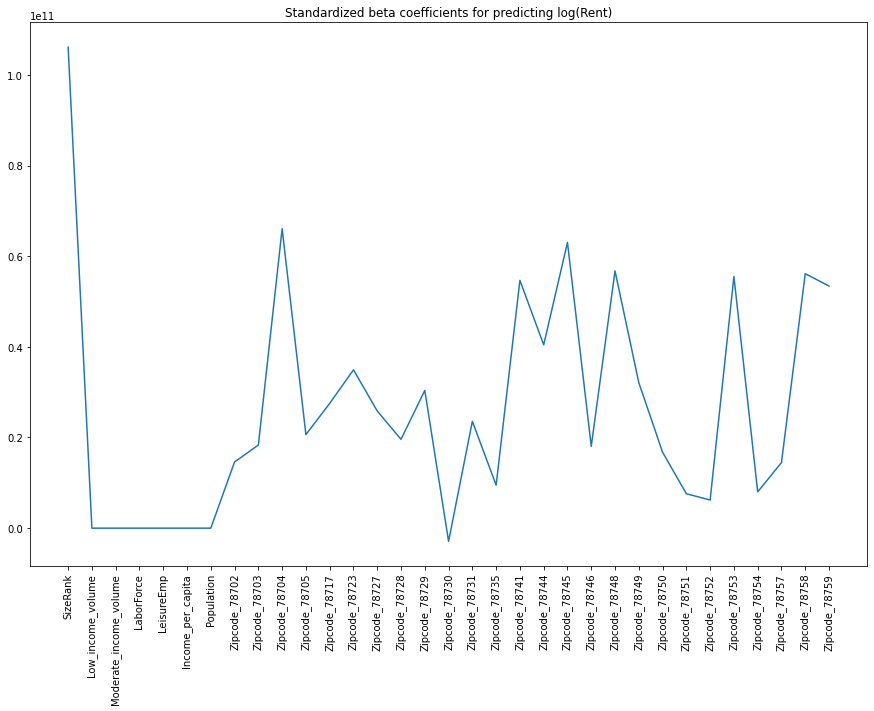

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.plot(ols.coef_)
plt.xticks(ticks = range(len(X_cols)),labels = X_cols,rotation = 90)
plt.title('Standardized beta coefficients for predicting log(Rent)')
plt.show()

# Attempts at time series analysis

In [76]:
token = 'Zipcode'
for code, value in austin_df.groupby(token):
            print(code)
            print(value.drop([token],axis=1).rolling(3).mean().head(10))

78701
            SizeRank         Rent  Low_income_volume  Moderate_income_volume  \
Date                                                                           
2010-09-01       NaN          NaN                NaN                     NaN   
2010-10-01       NaN          NaN                NaN                     NaN   
2010-11-01    1749.0  1539.666667       3.979657e+08            2.268473e+09   
2010-12-01    1749.0  1563.333333       4.186122e+08            2.391845e+09   
2011-01-01    1749.0  1591.000000       4.146187e+08            2.417486e+09   
2011-02-01    1749.0  1615.333333       4.038277e+08            2.437935e+09   
2011-03-01    1749.0  1634.000000       4.230648e+08            2.443053e+09   
2011-04-01    1749.0  1650.000000       4.348210e+08            2.463805e+09   
2011-05-01    1749.0  1666.666667       4.556104e+08            2.522875e+09   
2011-06-01    1749.0  1683.666667       4.363714e+08            2.548866e+09   

               LaborForce    Leis

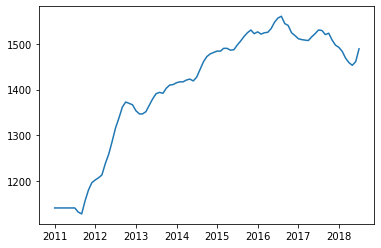

In [91]:
rents = austin_slice['Rent'].loc[austin_slice['Zipcode'] == '78746'].copy()
plt.plot(rents)

(0.0, 0.5)

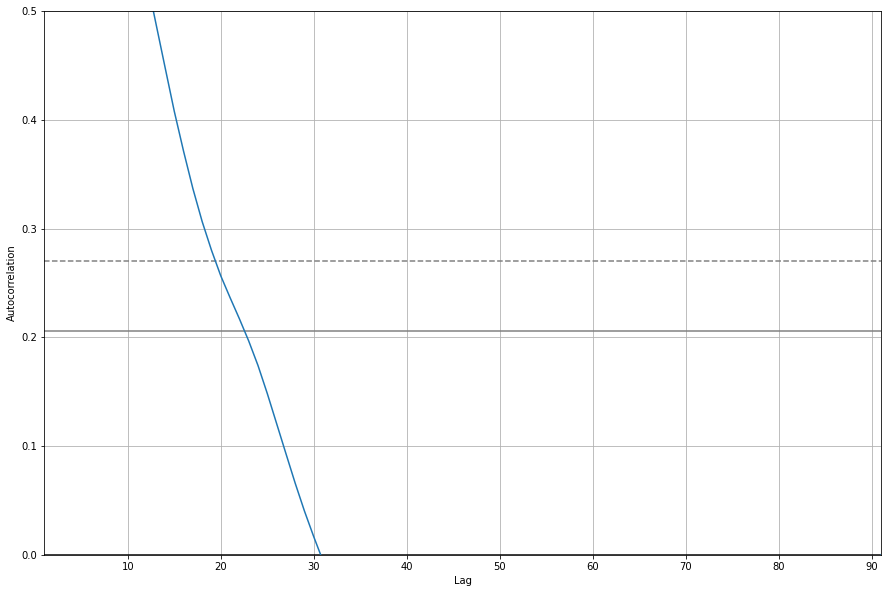

In [78]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize = (15,10))
autocorrelation_plot(rents)
plt.ylim([0,0.5])

In [79]:
from statsmodels.tsa.arima.model import ARIMA

In [80]:
# rents.index = rents.index.to_period('M')
model = ARIMA(rents, order = (20,1,0))

/Users/pizac/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/pizac/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/pizac/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [81]:
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rent   No. Observations:                   91
Model:                ARIMA(20, 1, 0)   Log Likelihood                -307.269
Date:                Tue, 23 Mar 2021   AIC                            656.537
Time:                        12:30:12   BIC                            709.033
Sample:                    01-01-2011   HQIC                           677.707
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7273      0.151      4.814      0.000       0.431       1.023
ar.L2          0.0763      0.158      0.483      0.629      -0.233       0.386
ar.L3         -0.1423      0.201     -0.709      0.4

## Use dickey-fuller test to assess stationary

In [82]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(rents, autolag='AIC', maxlag = 20 )
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

In [83]:
print(dfoutput)
print('Dickey-Fuller results indicate time series is non-stationary.')

Test Statistic                 -2.559930
p-value                         0.101565
#Lags Used                      4.000000
Number of Observations Used    86.000000
dtype: float64
Dickey-Fuller results indicate time series is non-stationary.


In [84]:
first_diff = np.diff(rents)
dftest = adfuller(first_diff, autolag='AIC', maxlag = 20 )
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

In [85]:
print(dfoutput)
print('Taking first derivative makes it stationary')

Test Statistic                 -3.983572
p-value                         0.001499
#Lags Used                      3.000000
Number of Observations Used    86.000000
dtype: float64
Taking first derivative makes it stationary


(-50.0, 50.0)

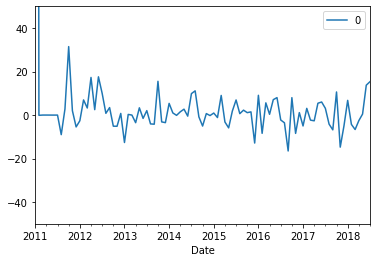

In [86]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

plt.ylim([-50,50])

<AxesSubplot:ylabel='Density'>

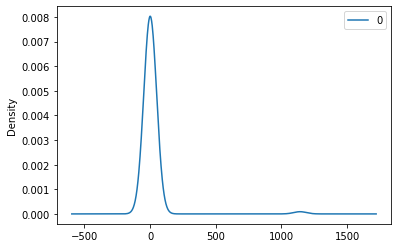

In [87]:
residuals.plot(kind='kde')

In [88]:
residuals.describe()

,0
count,91.000000
mean,13.624335
std,119.822531
min,-16.506933
25%,-3.324758
50%,0.464048
75%,4.410367
max,1142.000000


/Users/pizac/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=1568.844427, expected=1544.000000
predicted=1525.087362, expected=1540.000000
predicted=1533.820726, expected=1524.000000
predicted=1521.923607, expected=1518.000000
predicted=1514.883018, expected=1511.000000
predicted=1508.513203, expected=1509.000000
predicted=1508.908837, expected=1508.000000
predicted=1512.464241, expected=1507.000000
predicted=1508.407215, expected=1515.000000
predicted=1512.782876, expected=1522.000000
predicted=1527.722694, expected=1530.000000
predicted=1532.297631, expected=1529.000000
predicted=1532.893357, expected=1520.000000
predicted=1513.153046, expected=1523.000000
predicted=1523.486145, expected=1508.000000
predicted=1504.039830, expected=1497.000000
predicted=1485.297836, expected=1492.000000


/Users/pizac/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=1487.321492, expected=1483.000000
predicted=1478.109951, expected=1469.000000
predicted=1461.937290, expected=1459.000000
predicted=1457.146077, expected=1453.000000
predicted=1443.862605, expected=1461.000000
predicted=1469.801697, expected=1489.000000
Test RMSE: 10.486


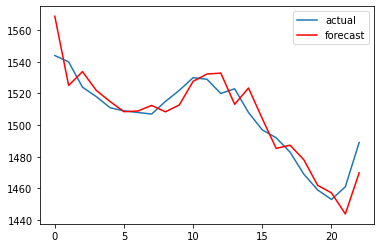

In [90]:
# split into train and test sets
from sklearn.metrics import mean_squared_error
X = rents.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(25,1,0))
    model_fit = model.fit()
    output = model_fit.forecast(typ = 'levels')
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = mean_squared_error(test, predictions)**0.5
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['actual','forecast'])
plt.show()



### NYCDSA method

In [ ]:
# from statsmodels.tsa.statespace import sarimax

In [ ]:
# sarimax()

In [ ]:
# predictions = []
# mse         = []

# for i in range(0, ret_train2.shape[0]-train_window):
#     loc   = slice(i, i+train_window)  # slice object abstracting start:end:step into an slice object
    
#     endog = ret_train2[endo_tickers].iloc[loc]
#     exog  = ret_train2[exog_tickers].iloc[loc] if useExog else None
#     new_model = VARMAX(endog=endog, exog = exog, order=order)


#     with warnings.catch_warnings():
#             warnings.filterwarnings("ignore", module='statsmodels')
#             res2 = new_model.fit(start_params=res2.params, disp=False,
#                                  maxiter=1000, method='lbfgs')
#             predicted_value = res2.predict()
            
#     mse.append(((endog-predicted_value)**2).mean(axis=0))
#     exog2 = exog.iloc[[-1]] if useExog else None
#     predictions.append(res2.forecast(1, exog = exog2))
#     if i%10 == 0:
#         print('Finish the %3d-th rolling 1-step-ahead forecast' %(i))

# predictions = pd.concat(predictions) 
# mse         = pd.concat(mse, axis=1)
# print("Terminated!")